# 딥러닝 기초 with 모두의 딥러닝 & Tensorflow 2 : 1주차-1

## Lab 01
텐서 2 설치하는데 참고하면 좋은 사이트: https://www.tensorflow.org/install/pip?hl=ko#heading_4

why tensorflow? 딥러닝 라이브러리들 간에 압도적으로 높은 점수 기록함 

Tensorflow: Machine Intelligence를 위한 open source library이자 data flow graph를 사용해서 수치 연산을 하는 python library


graph: nodes & edges로 구성되어 있는 자료구조. 

data flow graph: node-operations, edge-data(tensor) -> tensor가 돌아다니면서(flow) 연산 결과를 얻을 수 있는 패키지 -> tensorflow

- tensor: array -rank, shape, type
- rank: 몇 차원 array인지? 0차원-scalar, 1차원-[1,2,3], 2차원-[[1,2],[2,3],[3,4]], ..
- shape: (원소의 개수, 그 원소 속의 개수, 그 원소 속의 원소 속의 개수, …)
- type: float32, int64, …


#### Tensorflow version 2
placeholder의 개념 없어짐!
- 사용 이유: 모델 안에 임의의 값을 넣어서 훈련하고 예측하기 위해
-	tf2부터는 session 개념이 없어지면서 함수처럼 값을 넣을 수 있게 됨
- keras 패키지 활용 통한 코드의 간편화

## 1. 텐서플로우 및 필요한 라이브러리 설치

In [0]:
!pip install tensorflow
try:
  # %tensorlow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
    pass

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
tf.__version__

'2.2.0-rc3'

## 2. Graph의 노드 (즉 텐서) 생성

In [0]:
# constant를 만든다
# data flow graph의 노드 한 개를 생성하는 의미
hello = tf.constant("Hello, Tensorflow!")

sess = tf.Session()

print(sess.run(hello))

AttributeError: ignored

TF1의 주요 개념이었던 session이 사라졌다! 이제 tensor value를 보려면 tf.print(<tensor>)을 이용하면 간단하게 실행 가능

In [0]:
tf.print(hello)

Hello, Tensorflow!


In [0]:
# step 1: build graph (tensors)
node1 = tf.constant(3.0, tf.float32)
node2 = tf.constant(4.0)
# 더하기 노드
node3 = tf.add(node1, node2)

In [0]:
print("node1:", node1, "node2:", node2, "node3:", node3)
print("----------------------------------------------")
# feed data and run grapht (operation)
tf.print("node1:", node1, "node2:", node2, "node3:", node3)

node1: tf.Tensor(3.0, shape=(), dtype=float32) node2: tf.Tensor(4.0, shape=(), dtype=float32) node3: tf.Tensor(7.0, shape=(), dtype=float32)
----------------------------------------------
node1: 3 node2: 4 node3: 7


In [0]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
adder_node = a + b

AttributeError: ignored

placeholder 또한 앞서 언급했듯이 사라짐. 

그리고 대응하는 기능도 새로 생기지 않았는데 이는 tensor 값들을 실행하기 위해 session을 만들 필요가 없어졌기 때문. 

In [0]:
@tf.function
def adder(a, b):
    return a+b

In [0]:
out_1 = adder(3, 4.5)
tf.print(out_1)

7.5


In [0]:
out_2 = adder(tf.constant([1,3]),tf.constant([2,4]))
tf.print(out_2)

[3 7]


## 3. Variable, constant, ones, zeros

In [0]:
# Variable은 값이 변할 수 있는 값, constant는 상수
tf.print(tf.Variable([1,2,3]))
tf.print(tf.constant([[1],[2],[3]]))
# 그 외에 자주 쓰이는 기능
tf.print(tf.ones([2,2]))
tf.print(tf.zeros(3))

[1 2 3]
[[1]
 [2]
 [3]]
[[1 1]
 [1 1]]
[0 0 0]


## Lab 02 - linear regression

$$ H(x) = Wx + b$$
$$ cost(W,b) = \frac{1}{m}\sum_{i=0}^n(H(x^{(i)})-y^{(i)})^2 $$

## 1. data 및 기본 레이어 생성

In [0]:
# training data 생성
x_train = [1,2,3,4]
y_train = [0,-1,-2,-3]

In [0]:
# sequential 하게 노드와 레이어를 쌓을 기본 틀을 생성
# keras 라이브러리에 있는 Sequential()이라는 함수 이용
model = tf.keras.Sequential()

# units: output 차원, input_dim: input 차원 (optional)
# Dense: 신경망 속에 레이어를 하나 쌓는 것
model.add(tf.keras.layers.Dense(units=1, input_dim=1))

## 2. optimizer, loss 지정

In [0]:
# stochastic gradient descent를 진행하는 optimizer 생성
# lr: learning rate 지정
'''
learning_rate = 0.1
gradient = tf.reduce_mean((W * X - Y) * X)
descent = W - learning_rate * gradient
update = W.assign(descent)
'''
# TF1에서 해당되는 코드
sgd = tf.keras.optimizers.SGD(lr=0.1)  

# 모델에 loss와 optimizer를 설정해서 컴파일해준다
# mse: mean_squared_error, 1/m * sig (y'-y)^2
model.compile(loss='mse', optimizer=sgd)  

## 3. 모델 형태 확인하고 데이터 넣어서 훈련

In [0]:
# summary 메소드를 이용하면 모델의 개형을 볼 수 있음
# parameter 개수는 X변수 개수 + 1(편향)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [0]:
# input data, output data와 epoch 수를 지정하고 훈련 시작
model.fit(x_train, y_train, epochs=200)

Epoch 1/200
1/1 [==============================] - 0s 2ms/step - loss: 0.6860
Epoch 2/200
1/1 [==============================] - 0s 1ms/step - loss: 0.4035
Epoch 3/200
1/1 [==============================] - 0s 2ms/step - loss: 0.2711
Epoch 4/200
1/1 [==============================] - 0s 1ms/step - loss: 0.2063
Epoch 5/200
1/1 [==============================] - 0s 1ms/step - loss: 0.1722
Epoch 6/200
1/1 [==============================] - 0s 1ms/step - loss: 0.1522
Epoch 7/200
1/1 [==============================] - 0s 948us/step - loss: 0.1388
Epoch 8/200
1/1 [==============================] - 0s 986us/step - loss: 0.1287
Epoch 9/200
1/1 [==============================] - 0s 871us/step - loss: 0.1202
Epoch 10/200
1/1 [==============================] - 0s 994us/step - loss: 0.1127
Epoch 11/200
1/1 [==============================] - 0s 1ms/step - loss: 0.1059
Epoch 12/200
1/1 [==============================] - 0s 1ms/step - loss: 0.0995
Epoch 13/200
1/1 [==============================] - 0

## 4.  새로운 인스턴스 넣어서 prediction

In [0]:
# predict()는 새로운 인스턴스에 대한 예측 결과를 보여줌
y_predict = model.predict(np.array([5, 4]))
print(y_predict)

[[-3.9982708]
 [-2.9991102]]


## Lab 3 - Minimizing Cost

$$H(x) = Wx$$
$$ cost(W) = \frac{1}{m}\sum_{i=0}^n(H(x^{(i)})-y^{(i)})^2 $$

In [0]:
x_train = [1,2,3,4]
y_train = [0,-1,-2,-3]

In [0]:
tf.model = tf.keras.Sequential()
tf.model.add(tf.keras.layers.Dense(units=1, input_dim=1))

In [0]:
sgd = tf.keras.optimizers.SGD(lr=0.1)

tf.model.compile(loss='mse', optimizer=sgd)

In [0]:
tf.model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [0]:
# 여기까지는 lab 2 모델과 동일한데 epoch만 100 줄었다!
history = tf.model.fit(x_train, y_train, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 2ms/step - loss: 3.4940
Epoch 2/100
1/1 [==============================] - 0s 1ms/step - loss: 1.6207
Epoch 3/100
1/1 [==============================] - 0s 1ms/step - loss: 0.7765
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 0.3946
Epoch 5/100
1/1 [==============================] - 0s 1ms/step - loss: 0.2204
Epoch 6/100
1/1 [==============================] - 0s 1ms/step - loss: 0.1397
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 0.1010
Epoch 8/100
1/1 [==============================] - 0s 1ms/step - loss: 0.0814
Epoch 9/100
1/1 [==============================] - 0s 1ms/step - loss: 0.0705
Epoch 10/100
1/1 [==============================] - 0s 1ms/step - loss: 0.0636
Epoch 11/100
1/1 [==============================] - 0s 1ms/step - loss: 0.0586
Epoch 12/100
1/1 [==============================] - 0s 1ms/step - loss: 0.0546
Epoch 13/100
1/1 [==============================] - 0s 1ms/st

In [0]:
y_predict = tf.model.predict(np.array([5,4]))
print(y_predict)

[[-3.9733512]
 [-2.9862883]]


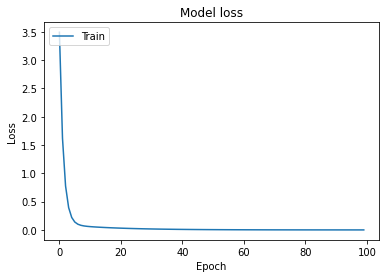

In [0]:
# training loss
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

## Lab 4 - Multi-variable linear regression

## 1. 여러 개의 변수가 있는 선형 회귀 모델

In [0]:
x_data = [[73., 80., 75.], # 1개의 instance
          [93., 88., 93.],
          [89., 91., 90.],
          [96., 98., 100.],
          [73., 66., 70.]]
y_data = [[152.],
          [185.],
          [180.],
          [196.],
          [142.]]

In [0]:
tf.model = tf.keras.Sequential()

tf.model.add(tf.keras.layers.Dense(units=1, input_dim=3))
# activation function을 지정: linear이 default
tf.model.add(tf.keras.layers.Activation('linear'))

In [0]:
# learning rate를 굉장히 작게 했다
tf.model.compile(loss='mse',optimizer=tf.keras.optimizers.SGD(lr=1e-5))
tf.model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 4         
_________________________________________________________________
activation (Activation)      (None, 1)                 0         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


parameter 개수: bias + x 변수 3개 (column 개수)

In [0]:
history = tf.model.fit(x_data,y_data,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 1ms/step - loss: 54758.6641
Epoch 2/100
1/1 [==============================] - 0s 1ms/step - loss: 17164.9746
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 5381.3491
Epoch 4/100
1/1 [==============================] - 0s 1ms/step - loss: 1687.8073
Epoch 5/100
1/1 [==============================] - 0s 995us/step - loss: 530.0785
Epoch 6/100
1/1 [==============================] - 0s 1ms/step - loss: 167.1914
Epoch 7/100
1/1 [==============================] - 0s 1ms/step - loss: 53.4450
Epoch 8/100
1/1 [==============================] - 0s 1ms/step - loss: 17.7911
Epoch 9/100
1/1 [==============================] - 0s 1ms/step - loss: 6.6153
Epoch 10/100
1/1 [==============================] - 0s 1ms/step - loss: 3.1118
Epoch 11/100
1/1 [==============================] - 0s 1ms/step - loss: 2.0133
Epoch 12/100
1/1 [==============================] - 0s 3ms/step - loss: 1.6686
Epoch 13/100
1/1 [=====================

In [0]:
y_predict = tf.model.predict(np.array([[72.,93.,90.]]))
print(y_predict)

[[171.68987]]


## 2. 파일에서 읽어오기

In [0]:
xy = np.loadtxt('data-01-test-score.csv', delimiter=',')
# 마지막 칼럼 제외하고 x, 마지막 칼럼만 y
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

In [0]:
print(x_data, "\nx_data shape:", x_data.shape)
print(y_data, "\ny_data shape:", y_data.shape)

[[ 73.  80.  75.]
 [ 93.  88.  93.]
 [ 89.  91.  90.]
 [ 96.  98. 100.]
 [ 73.  66.  70.]
 [ 53.  46.  55.]
 [ 69.  74.  77.]
 [ 47.  56.  60.]
 [ 87.  79.  90.]
 [ 79.  70.  88.]
 [ 69.  70.  73.]
 [ 70.  65.  74.]
 [ 93.  95.  91.]
 [ 79.  80.  73.]
 [ 70.  73.  78.]
 [ 93.  89.  96.]
 [ 78.  75.  68.]
 [ 81.  90.  93.]
 [ 88.  92.  86.]
 [ 78.  83.  77.]
 [ 82.  86.  90.]
 [ 86.  82.  89.]
 [ 78.  83.  85.]
 [ 76.  83.  71.]
 [ 96.  93.  95.]] 
x_data shape: (25, 3)
[[152.]
 [185.]
 [180.]
 [196.]
 [142.]
 [101.]
 [149.]
 [115.]
 [175.]
 [164.]
 [141.]
 [141.]
 [184.]
 [152.]
 [148.]
 [192.]
 [147.]
 [183.]
 [177.]
 [159.]
 [177.]
 [175.]
 [175.]
 [149.]
 [192.]] 
y_data shape: (25, 1)


In [0]:
# Sequential생성과 Dense 추가를 다음과 같이 pipeline처럼 한 번에 할 수 있다
# 또 활성화함수는 사실 별도 layer로 추가하지 않고 Dense 안에 추가할 수 있다
# 그러면 activation 레이어가 모델 구조에 별도로 존재하지 않게 된다
tf.model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_dim=3, activation='linear')
    # tf.keras.layers.Activation('linear')
    # 여러 층의 레이어를 추가할 때는 쉼표(,)로 구분
])

tf.model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [0]:
tf.model.compile(loss='mse', optimizer=tf.keras.optimizers.SGD(lr=1e-5))
history = tf.model.fit(x_data, y_data, epochs=200)

Epoch 1/200
1/1 [==============================] - 0s 3ms/step - loss: 5407.9189
Epoch 2/200
1/1 [==============================] - 0s 1ms/step - loss: 2013.2472
Epoch 3/200
1/1 [==============================] - 0s 2ms/step - loss: 758.1353
Epoch 4/200
1/1 [==============================] - 0s 1ms/step - loss: 294.0775
Epoch 5/200
1/1 [==============================] - 0s 2ms/step - loss: 122.4948
Epoch 6/200
1/1 [==============================] - 0s 1ms/step - loss: 59.0482
Epoch 7/200
1/1 [==============================] - 0s 1ms/step - loss: 35.5826
Epoch 8/200
1/1 [==============================] - 0s 2ms/step - loss: 26.8990
Epoch 9/200
1/1 [==============================] - 0s 1ms/step - loss: 23.6807
Epoch 10/200
1/1 [==============================] - 0s 2ms/step - loss: 22.4831
Epoch 11/200
1/1 [==============================] - 0s 2ms/step - loss: 22.0326
Epoch 12/200
1/1 [==============================] - 0s 2ms/step - loss: 21.8584
Epoch 13/200
1/1 [========================

In [0]:
# 새로운 인스턴스를 예측할 수 있다!
print("Your score will be ", tf.model.predict([[100, 70, 101]]))
print("Other scores will be ", tf.model.predict([[60, 70, 110], [90, 100, 80]]))

Your score will be  [[181.53813]]
Other scores will be  [[151.58394]
 [185.79083]]


# 복습 퀴즈~!


### 1. 다음과 같은 구조의 신경망에 층을 쌓아보자.

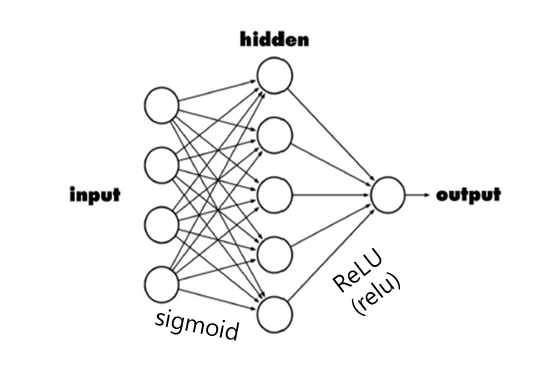

In [0]:
## 코드 작성 부분






### 2. 다음과 같은 summary가 나오는 신경망의 구조를 그려보자

(activation function은 sigmoid, tanh, relu를 마음대로 이용한다)

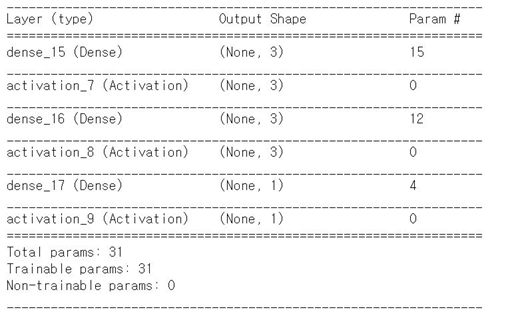